In [2]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=88de5545526368706bf46f9821eff9520ac89476458827df44883ad8af14d6a5
  Stored in directory: /root/.cache/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


In [3]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import wikipedia
from wikipedia.exceptions import WikipediaException


In [4]:
#Topics and Articles
# selected topics
topics = ["Association football", "Airplane", "Machine learning", "Financial services"]

# list of articles to be downloaded
articles = ["FIFA World Cup", "CONMEBOL–UEFA Cup of Champions", "2020 Summer Olympics", "The Death Match", "Messi–Ronaldo rivalry", "Major League Soccer", "Inter Miami", "Bengaluru FC", "Kuwait", "List of women's footballers with 100 or more international caps", "Episkyros", 
            "Wright Brothers Day", "Airbus A380", "Air France Flight 4590", "Lift-to-drag ratio", "Federal Aviation Administration", "Jet fuel", "American Airlines", "Airport", "de Havilland Comet", 
           "Data stream mining", "Leo Breiman", "Sam Altman", "Tesla, Inc.", "Natural Language Processing", "Deep Learning",
           "IBM Watson Studio", "MathWorks", "Overfitting", "Netflix", "Decision tree learning", "pandas (software)", 
           "Credit card", "List of investment banks", "Foreign exchange market", "International Monetary Fund", "Jamaica Accords", "The Wall Street Journal", 
           "United States dollar"]

# download and store articles (summaries) in this variable
data = []
for article in articles:
    try:
        data.append(wikipedia.summary(article))
    except WikipediaException:
        continue


*   Articles with index 0 to 10 are in the Association football topic.
*   Articles with index 11 to 19 are in the Airplane topic.
*   Articles with index 20 to 31 are in the Machine Learning Topic
*   Articles with index 32 to 38 are in the Financial Services Topic





In [5]:
#Text Preprocessing
import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def clean_message(message):
    message = re.sub(r"\S*https?://\S+", "", message) #Remove URLs
    message = re.sub(r"[^\w\s]", "", message) #Remove punctuation marks
    message = message.lower() #Convert to lowercase
    
    #Tokenize text and remove stop words
    token_lowercase = word_tokenize(message)
    stop_words = stopwords.words('english')
    token_final=[]
    for i in token_lowercase:
        if i in stop_words:
            continue
        token_final.append(i)
    
    #Lemmatization
    message_cleaned = []
    for i in token_final:
        temp = WordNetLemmatizer().lemmatize(i)
        message_cleaned.append(temp)
    
    message_cleaned = " ".join(message_cleaned)
        
    return message_cleaned

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [6]:
#Cleaned Wikipedia Data
cleaned_data = []

for i in data:
    cleaned_data.append(clean_message(i))

In [9]:
#Perform TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
X = vectorizer.fit_transform(cleaned_data)

In [11]:
#Implement T-SNE
from sklearn.manifold import TSNE

# call TSNE() to fit the data
X_tsne = TSNE(perplexity = 6, learning_rate = 'auto', init = "random").fit_transform(X)

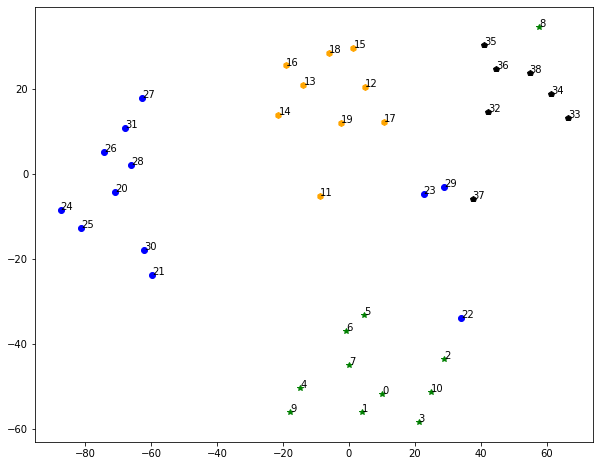

In [12]:
#Plot and Annotate the points
import matplotlib.pyplot as plt

x_axis = []
y_axis = []

for i in X_tsne:
    x_axis.append(i[0])
    y_axis.append(i[1])

df_tsne = pd.DataFrame()
df_tsne["x"] = x_axis
df_tsne["y"] = y_axis


# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

for i in range(0, 11): #These are the articles related to the topic 'Association football'
    plt.plot(df_tsne["x"][i],df_tsne["y"][i], marker = '*', color = 'green')
    plt.text(df_tsne["x"][i]+.05, df_tsne["y"][i]+.05, i, fontsize=10)

for i in range(11, 20): #These are the articles related to the topic 'Airplane'
    plt.plot(df_tsne["x"][i],df_tsne["y"][i], marker = 'h', color = 'orange')
    plt.text(df_tsne["x"][i]+.05, df_tsne["y"][i]+.05, i, fontsize=10)

for i in range(20, 32): #These are the articles related to the topic 'Machine Learning'
    plt.plot(df_tsne["x"][i],df_tsne["y"][i], marker = 'o', color = 'blue')
    plt.text(df_tsne["x"][i]+.05, df_tsne["y"][i]+.05, i, fontsize=10)

for i in range(32, 39): #These are the articles related to the topic 'Financial services'
    plt.plot(df_tsne["x"][i],df_tsne["y"][i], marker = 'p', color = 'black')
    plt.text(df_tsne["x"][i]+.05, df_tsne["y"][i]+.05, i, fontsize=10)


Each Cluster represents a Specific Topic and most of the articles are clustered with their appropriate topic.